# SLA-Analysis
### Royer Ticse Torres, July 2019


This notebook is a SLA-analysis in python step-by-step. Starting from raw data to making prediction model on the "ticket_cientista" dataset.

![title](sla1.png "Header")



# Dive into data
First things first!. Understand the content of the data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
from dateutil.parser import parse

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
address = 'dataset/ticket_cientista.csv'
df = pd.read_csv(address , sep=';')
df['datetime'] = pd.to_datetime(df['currentDateTime'], format='ISODate("%Y-%m-%dT%H:%M:%S.000%z")')
df['datetime'] = pd.to_datetime(df['datetime'], utc='True')

df = df.set_index('datetime')

df.index = df.index.tz_convert(None)
df.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (25,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,attendanceType,attendanceTypeId,averageRepairTime,averageRepairTimeType,averageServiceTime,averageSolutionTime,averageWaitingTimeType,callBranch,callBranchName,callCloseDate,...,repairTimeEngineer,schedulingDate,schedulingDateTime,schedulingTime,segmentId,siteCity,siteName,siteState,slaStatus,type
datetime,,,,,,,,,,,,,,,,,,,,,
2018-02-07 18:49:02,1,5,0,35.0,222,222,52.0,86,Natal,NaN,...,0.0,20180207,"ISODate(""2018-02-07T15:00:00.000-02:00"")",15:00,35,CAICÓ,LEXBRA000010380,RN,NaN,U
2019-02-22 16:03:17,0,2,164,27.0,131,295,66.0,52,Campinas,20190222.0,...,164.0,NaN,NaN,NaN,35,PIRACICABA,LEXMARK00013169,SP,N,U
2019-02-22 15:11:45,0,2,19,27.0,264,283,66.0,52,Campinas,20190222.0,...,19.0,NaN,NaN,NaN,35,JUNDIAI,LEXMARK00013402,SP,N,U
2019-02-26 15:53:54,0,2,360,56.0,257,617,67.0,70,Paissandu,NaN,...,0.0,NaN,NaN,NaN,35,SAO PAULO,LEXMARK00004162,SP,S,U
2019-02-26 15:31:44,0,2,63,21.0,146,209,55.0,AD,Campo Grande,NaN,...,0.0,NaN,NaN,NaN,35,CAMPO GRANDE,LEXMARK00012469,MS,N,U


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43301 entries, 2018-02-07 18:49:02 to 2019-01-02 13:59:05
Data columns (total 44 columns):
attendanceType            43301 non-null int64
attendanceTypeId          43301 non-null int64
averageRepairTime         43301 non-null int64
averageRepairTimeType     43298 non-null float64
averageServiceTime        43301 non-null int64
averageSolutionTime       43301 non-null int64
averageWaitingTimeType    43298 non-null float64
callBranch                43301 non-null object
callBranchName            43301 non-null object
callCloseDate             38856 non-null float64
callCloseTime             38856 non-null object
callNumber                43301 non-null int64
callOpenDate              43301 non-null int64
callOpenTime              43301 non-null object
callRegion                43289 non-null float64
callRegional              43301 non-null object
callRegionalName          43301 non-null object
callRegionName            32676 non-null ob

In [4]:
df_times = df[['openDateTime', 'deadlineDateTime']]
df_times = df_times.dropna()
df_times = df_times.loc[(df_times.index >'2019-01-01')]
df_times = df_times.sort_index()
df_times.head()


,openDateTime,deadlineDateTime
datetime,,
2019-01-01 13:43:43,"ISODate(""2018-12-31T16:17:00.000-02:00"")","ISODate(""2019-01-07T14:18:00.000-02:00"")"
2019-01-01 15:40:19,"ISODate(""2019-01-01T10:48:00.000-02:00"")","ISODate(""2019-01-02T15:48:00.000-02:00"")"
2019-01-01 16:44:52,"ISODate(""2018-12-31T20:04:00.000-02:00"")","ISODate(""2019-01-02T17:00:00.000-02:00"")"
2019-01-01 18:24:56,"ISODate(""2019-01-01T09:54:00.000-02:00"")","ISODate(""2019-01-02T14:54:00.000-02:00"")"
2019-01-01 19:11:29,"ISODate(""2018-12-31T20:09:00.000-02:00"")","ISODate(""2019-01-02T17:00:00.000-02:00"")"


In [5]:
df_deadline = df_times.sample(n=3200,random_state=97, axis=0)

df_deadline["openDateTime_utc"] = pd.to_datetime(df_deadline['openDateTime'], format='ISODate("%Y-%m-%dT%H:%M:%S.000%z")',errors='ignore')
df_deadline["openDateTime_utc"] = pd.to_datetime(df_deadline['openDateTime_utc'], utc='True')
df_deadline["deadlineDateTime_utc"] = pd.to_datetime(df_deadline['deadlineDateTime'], format='ISODate("%Y-%m-%dT%H:%M:%S.000%z")')
df_deadline["deadlineDateTime_utc"] = pd.to_datetime(df_deadline['deadlineDateTime_utc'], utc='True')

df_deadline["deadline"] = df_deadline["deadlineDateTime_utc"] - df_deadline["openDateTime_utc"] 
df_deadline["deadline"].mean()

Timedelta('4 days 02:49:14.568750')

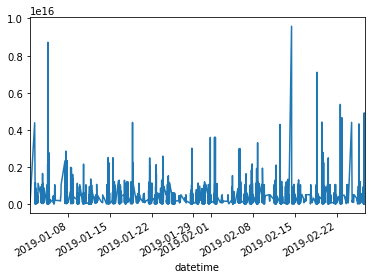

In [6]:
df_deadline["deadline"].plot()

# What data tell us?
* Mean deadline for a call is ~4 days however we can see outliers.
* ?


Since it is essential to prevent SLA violations as much as possible to enhance customer satisfaction and avoid penalty payments. The proposed model will run in a 2-day period so that the manager can make decisions based on the predictions for the next two days. The prediction model is based on machine learning regression techniques and trained using historical process instances.